# Лабораторная работа №2: 

Выполнила студентка группы 9383 Лапина Анастасия.

## Цель:

Практическое применение дискретного преобразования Фурье c использованием библиотек Python для анализа речевых сигналов.

## Задачи лабораторной работы:

1. Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.
2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса
3. Построить сонограмму по записи своего голоса.

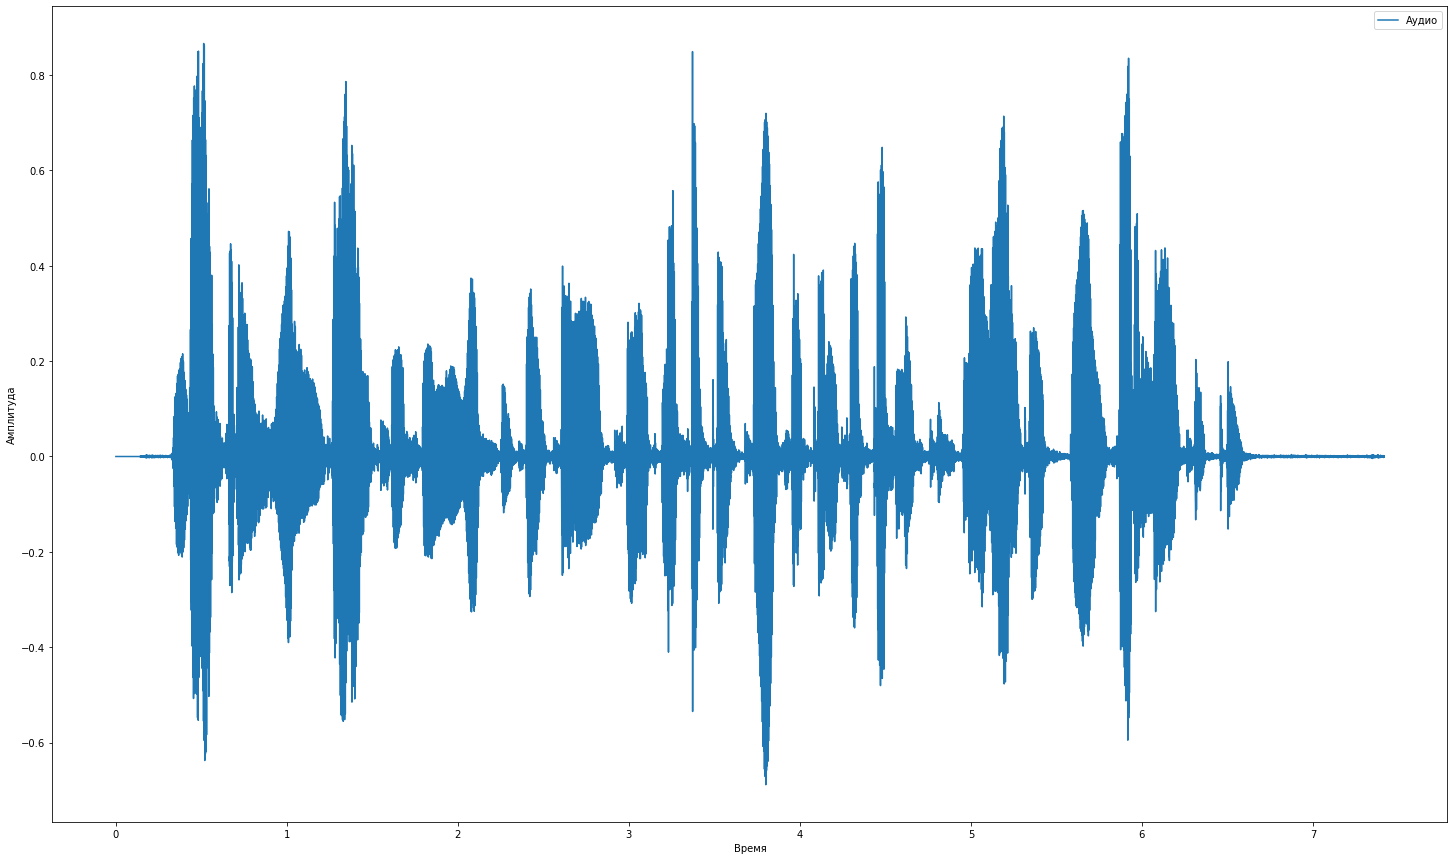

In [ ]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy import hamming


audio_data = '/content/матпакеты2.wav'
signal, fd = librosa.load(audio_data)

n = 500
N = len(signal)
time = np.linspace(0, N / fd, N)


plt.plot(time, signal, label="Аудио")
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.legend()
plt.show()



##Построение траектории основного тона (F0) на записи голоса.
Частотой основного тона (F0) называют частоту вибрации голосовых связок. У каждого говорящего базовая частота основного тона индивидуальна и обусловлена особенностями строения гортани. Частота основного тона различна для мужских (примерный диапазон: 80− 200 Hz) и женских (примерный диапазон: 160− 350 Hz) голосов.

163523


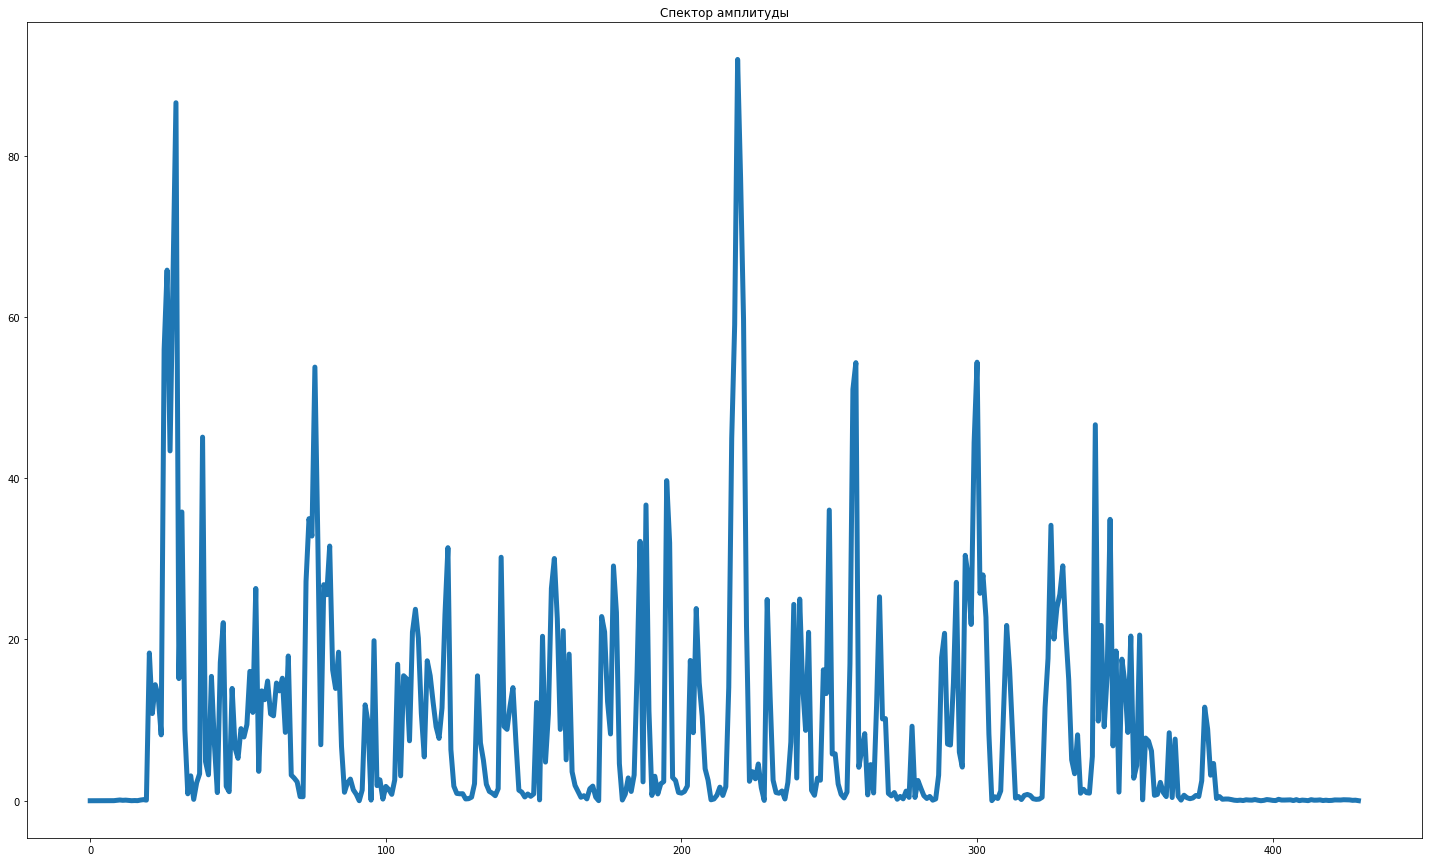

In [32]:
N = 512
Sr = round(fd/N)
overlap = 0.512/2
print(len(signal))
intervals = [signal[i:i + N] for i in range(0, len(signal), N - int(overlap * N))]
intervals = [i * np.hamming(len(i)) for i in intervals]

def DFT(x):
    x = np.asarray(x, dtype = float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

intervals = [DFT(i) for i in intervals]
amplitude_spectrum = [sum([k**2 for k in i[:int(len(i)/2)]])**0.5 for i in intervals]
amplitude_spectrum = np.array([i.real for i in amplitude_spectrum])

plt.title('Спектор амплитуды')
plt.plot(amplitude_spectrum, linewidth = 5)

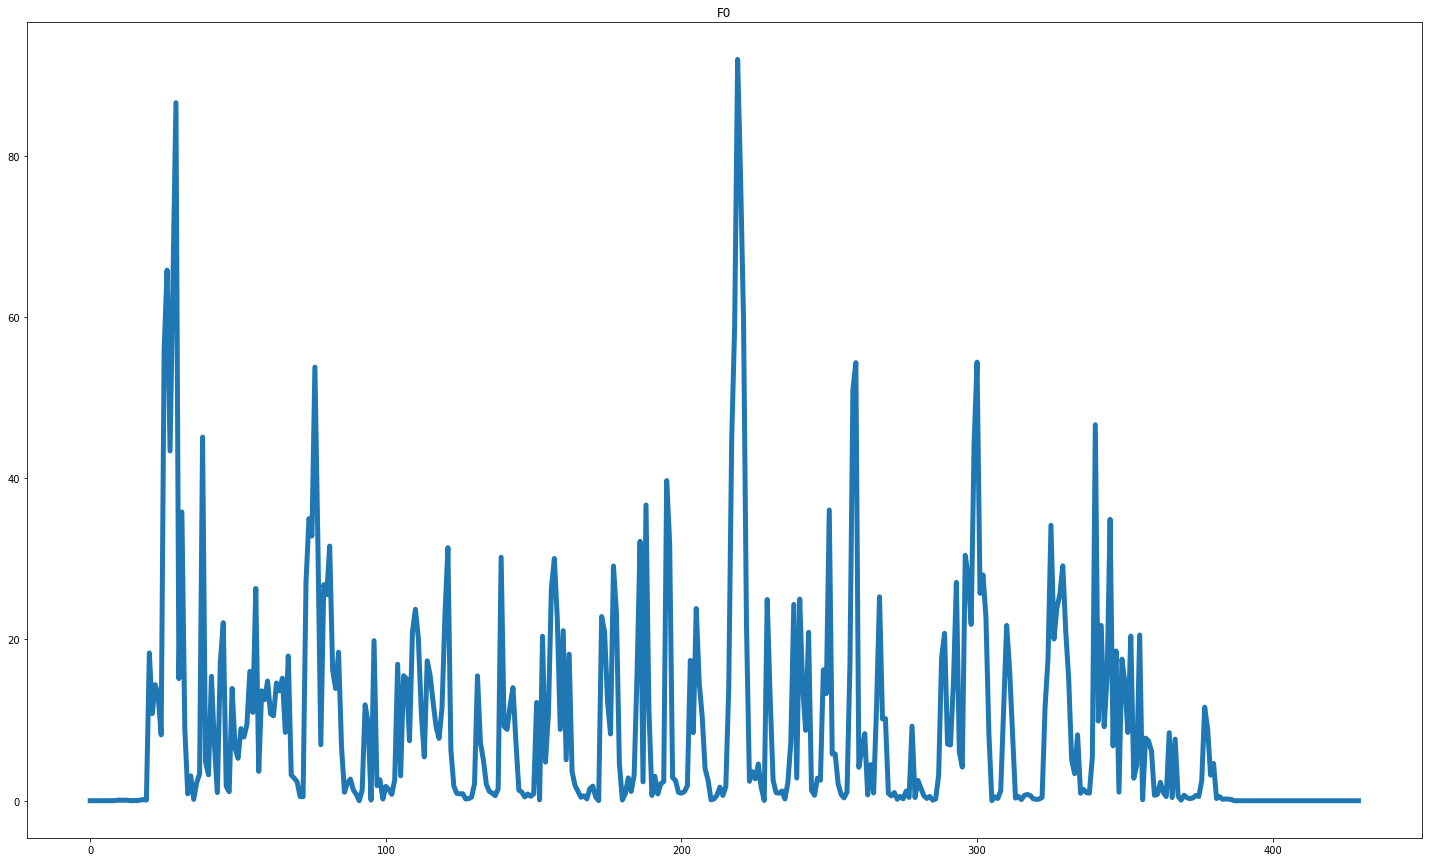

In [34]:
F0 = []

for i in [amplitude_spectrum[segment:segment + Sr] for segment in range(len(amplitude_spectrum))[::Sr]]:        
    segment = np.array(i)
    if segment.max() > 3 * segment.mean():            
        F0 += segment.tolist()
    else:
        F0 += [0 for i in range(len(segment))]       
        
plt.title('F0')        
plt.plot(F0, linewidth = 5)       

## Построение траектории второй, третьей и четвертой формантных частот на записи своего голоса, используя ДПФ 

### Построение F1:

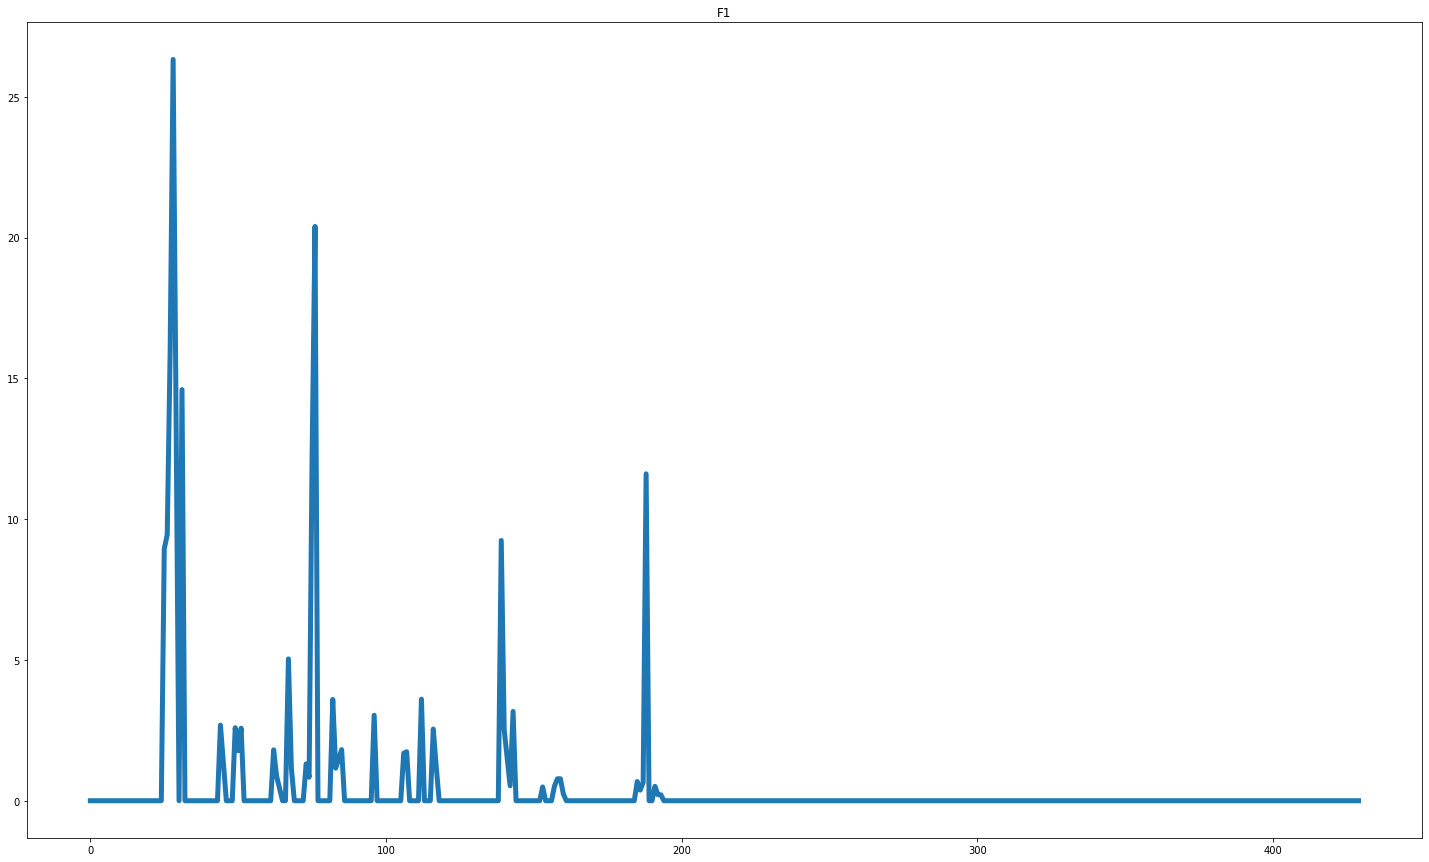

In [35]:
F1 = []
i = 0
n = len(F0)
while i < n:
    try:
        interval_max = max([F0[2 * i], F0[2 * i - 1], F0[2 * i + 1]])
        if F0[i] < 2 * interval_max: 
            F1 += [0]
        else:
            F1 += [interval_max]
    except:
        F1 += [0]
    i += 1
    
plt.title('F1')        
plt.plot(F1, linewidth = 5)   

### Построение F2:

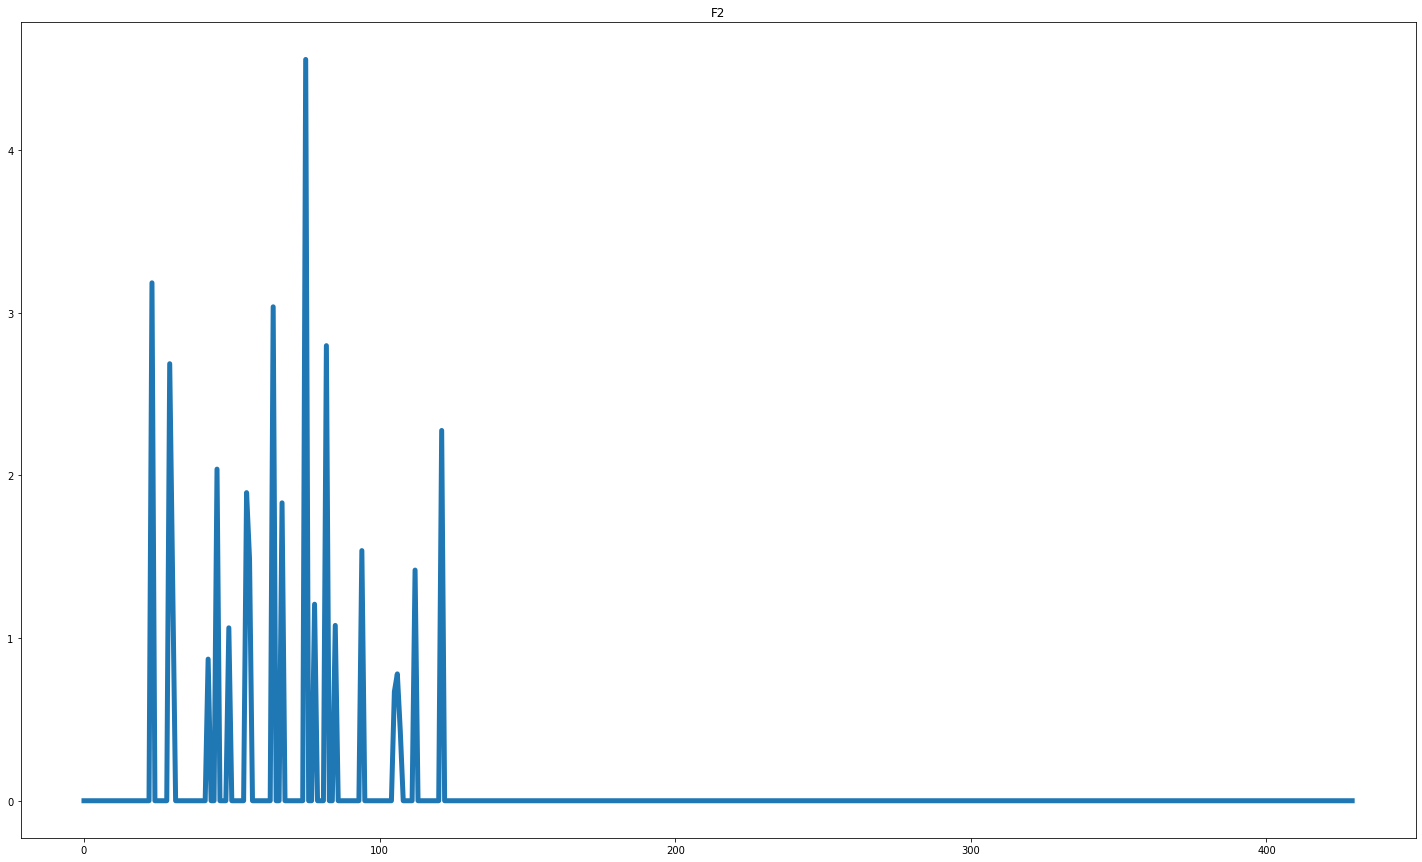

In [36]:
F2 = []
i = 0
n = len(F0)
while i < n:
    try:
        interval_max = max([F0[3*i], F0[3*i-1], F0[3*i+1]])
        if F0[i] < 4*interval_max:
            F2 += [0]
        else:
            F2 += [interval_max]
    except:
        F2 += [0]
    i += 1
    
plt.title('F2')        
plt.plot(F2, linewidth = 5)      

### Построение F3:

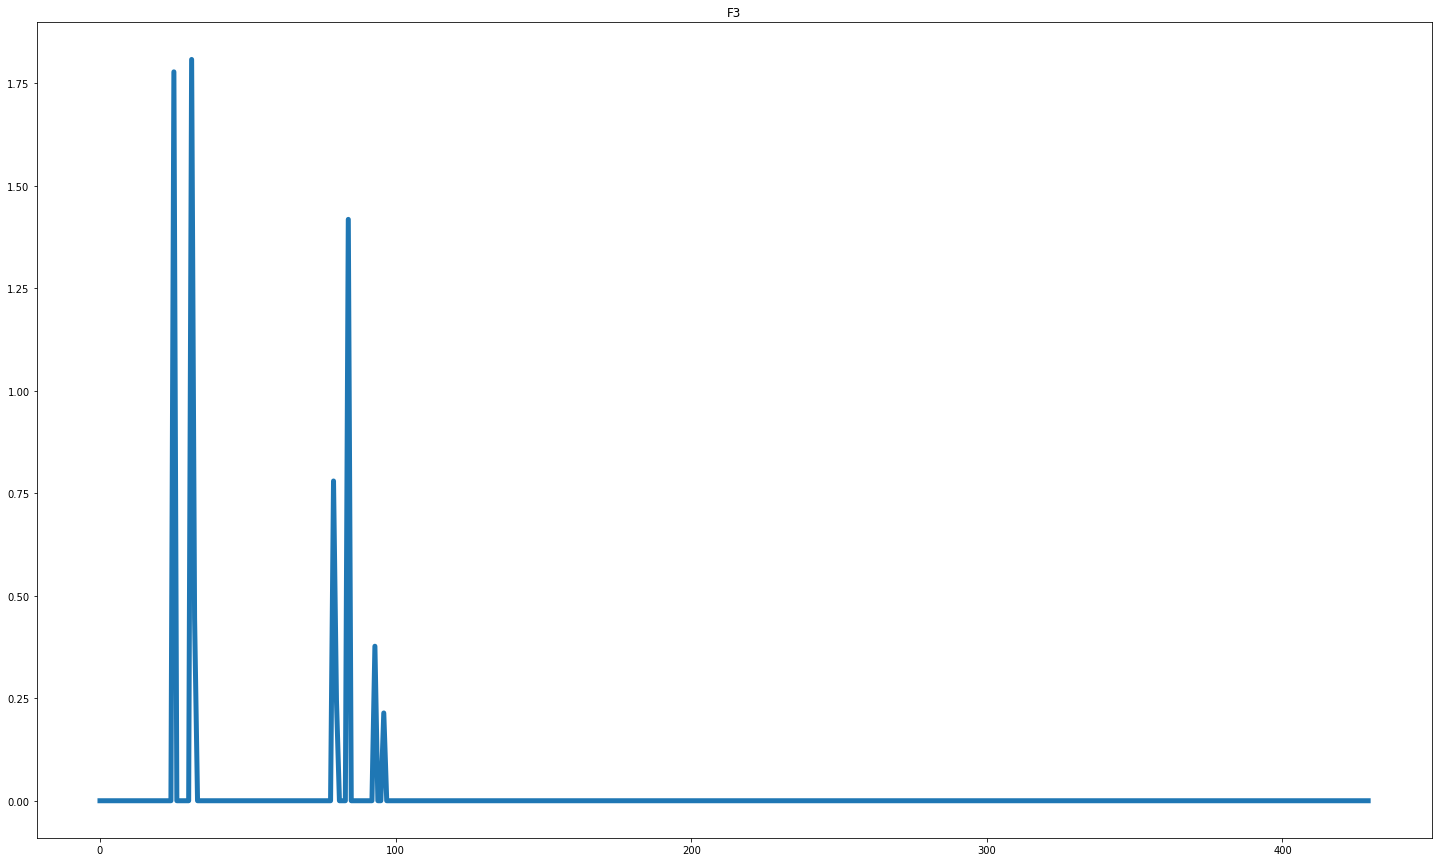

In [37]:
F3 = []
i = 0
n = len(F0)
while i < n:
    try:
        interval_max = max([F0[4 * i], F0[4 * i - 1], F0[4 * i + 1]])
        if F0[i] < 8 * interval_max:
            F3 += [0]
        else: 
            F3 += [interval_max]
    except:
        F3 += [0]
    i += 1
    
plt.title('F3')        
plt.plot(F3, linewidth = 5)      

## Построение сонограммы

Сонограма — это изображение кратковременного спектра сигнала (спектров на последовательности кадров) в координатах времени (горизонтальная ось), частоты (вертикальная ось) и энергии голоса (степень зачернения, цвет). Интенсивность темного (или цвета) отображает амплитуду спектра. Наиболее темные горизонтальные полосы частот показывают спектральные максимумы.

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


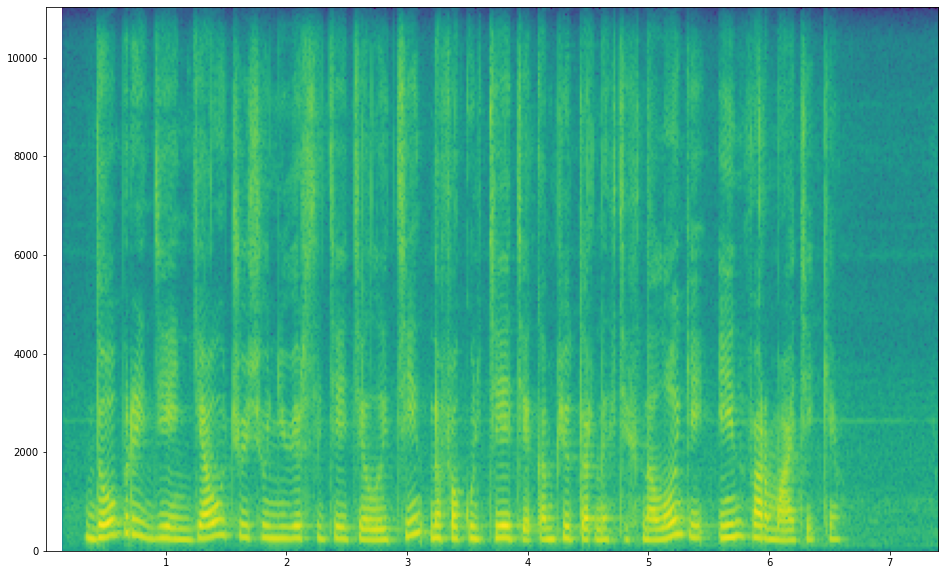

In [40]:
plt.figure(figsize=(16, 10))

plt.specgram(signal,NFFT=N, pad_to=N, Fs=fd)
plt.show()

## Выводы

В ходе выполнения лабораторной работы были изучены и практически применены дискретные преобразования Фурье c использованием библиотек Python для анализа речевых сигналов.